In [1]:
import sys
import os
if os.getenv('RBMHOME') != None:
    os.chdir(os.getenv('RBMHOME'))
sys.path.append(os.getcwd() + '/src')
sys.path.append(os.getcwd() + '/src/RBMs')
import importlib
import importlib
import torch
from torch.nn.functional import one_hot
import scoresL
from h5py import File
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
from matplotlib import cm
from tqdm import tqdm
import gzip
from matplotlib.colors import to_hex
import h5py
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec

In [2]:
# use LaTeX fonts in the plots
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'serif'
plt.rcParams.update({'font.size': 15})
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{bm}'
plt.rcParams['legend.title_fontsize'] = 'xx-small'

In [8]:
# to change
device = torch.device('cuda:0')
# model = 'models/TestFourMasters/Test4MRdm.h5'
# model = 'models/TestFourMasters/BernoulliBernoulliSslRBM-2024.9.26.16.29-TestFourMasters-ep10000-lr0.004-Nh512-NGibbs100-mbs500-partialLabelsFalse-lr_labels0.004-L10.0-L20.0-Rdm.h5'
model = 'models/TestFourMasters/BernoulliBernoulliSslRBM-2024.9.26.16.27-TestFourMasters-ep10000-lr0.004-Nh512-NGibbs100-mbs500-partialLabelsFalse-lr_labels0.004-L10.0-L20.0-PCD.h5'
data_name = 'PIANO'
data_set = 'train'
cmap = 'tab10'

folder_name = f'/home/adecelle/work/FeF-main/results/FeF_scores/FeF_scores-{data_name}-Nh512-Rdm100-train'
os.makedirs(folder_name,exist_ok=True)
gen_time = 1000
num_samples = -1
num_points_trajectory = 50
batch_size = 300
replication_factor = 2

In [9]:
fname_models = {
    'PIANO' : model
}

it_mcmc = 10000

data_set = 'train'
dataset_name = 'PIANO'
fname_data = 'data/TestFourMasters.h5'
data_type = torch.int64
RBM = importlib.import_module('BernoulliBernoulliSslRBM').RBM

alltimes_PCD = {'PIANO' : []}
acc_lists_PCD = {'PIANO' : []}

f = h5py.File(fname_data, 'r')
X_data = torch.tensor(f[data_set][()], device=device, dtype=data_type)*1.0
labels_data_string = f[data_set + '_labels'].asstr()[()]

lab2num = {l : i for i, l in enumerate(np.unique(labels_data_string))}
labels_data = torch.tensor([lab2num[l] for l in labels_data_string], device=device, dtype=torch.int64)
rbm = RBM(device=device)
rbm.loadRBM(fname_models[dataset_name])
L_init = torch.randint(0, rbm.num_categ, size=(X_data.shape[0],), device=device).type(torch.int64)
alltime = rbm.list_save_rbm
for t in alltime[alltime < 35000]:
    rbm.loadRBM(fname_models[dataset_name], stamp=t)
    predictions = rbm.predict(X_data, L_init, it_mcmc=it_mcmc).argmax(-1)
    accuracy = ((labels_data == predictions).sum() / len(labels_data)).cpu().numpy()
    acc_lists_PCD[dataset_name].append(accuracy)
    alltimes_PCD[dataset_name].append(t * rbm.UpdByEpoch)

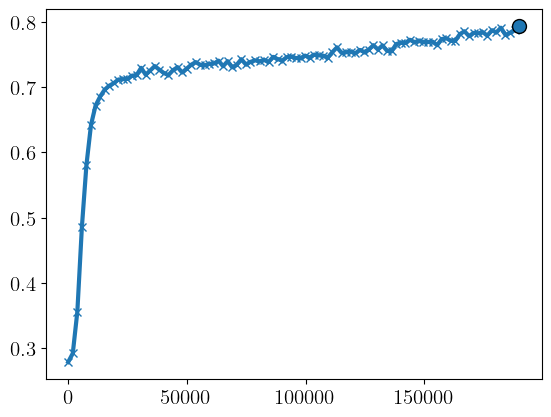

In [11]:
dataset_name = 'PIANO'
#ax[1, 3].set_xscale('log')
acc_max_idx = np.argmax(acc_lists_PCD[dataset_name])
t_acc_max = alltimes_PCD[dataset_name][acc_max_idx]
acc_max = float(acc_lists_PCD[dataset_name][acc_max_idx])
plt.plot(np.array(alltimes_PCD[dataset_name]), acc_lists_PCD[dataset_name], lw=3, zorder=0,marker='x')
plt.scatter(t_acc_max, acc_max, s=100, zorder=1, edgecolors='black')


In [12]:
# to change
device = torch.device('cuda:0')
# model = 'models/TestFourMasters/Test4MRdm.h5'
model = 'models/TestFourMasters/BernoulliBernoulliSslRBM-2024.9.26.16.29-TestFourMasters-ep10000-lr0.004-Nh512-NGibbs100-mbs500-partialLabelsFalse-lr_labels0.004-L10.0-L20.0-Rdm.h5'
# model = 'models/TestFourMasters/BernoulliBernoulliSslRBM-2024.9.26.16.27-TestFourMasters-ep10000-lr0.004-Nh512-NGibbs100-mbs500-partialLabelsFalse-lr_labels0.004-L10.0-L20.0-PCD.h5'
data_name = 'PIANO'
data_set = 'train'
cmap = 'tab10'

folder_name = f'/home/adecelle/work/FeF-main/results/FeF_scores/FeF_scores-{data_name}-Nh512-Rdm100-train'
os.makedirs(folder_name,exist_ok=True)
gen_time = 1000
num_samples = -1
num_points_trajectory = 50
batch_size = 300
replication_factor = 2

In [13]:
fname_models = {
    'PIANO' : model
}

it_mcmc = 100

data_set = 'train'
dataset_name = 'PIANO'
fname_data = 'data/TestFourMasters.h5'
data_type = torch.int64
RBM = importlib.import_module('BernoulliBernoulliSslRBM').RBM

alltimes_Rdm = {'PIANO' : []}
acc_lists_Rdm = {'PIANO' : []}

f = h5py.File(fname_data, 'r')
X_data = torch.tensor(f[data_set][()], device=device, dtype=data_type)*1.0
labels_data_string = f[data_set + '_labels'].asstr()[()]

lab2num = {l : i for i, l in enumerate(np.unique(labels_data_string))}
labels_data = torch.tensor([lab2num[l] for l in labels_data_string], device=device, dtype=torch.int64)
rbm = RBM(device=device)
rbm.loadRBM(fname_models[dataset_name])
L_init = torch.randint(0, rbm.num_categ, size=(X_data.shape[0],), device=device).type(torch.int64)
alltime = rbm.list_save_rbm
for t in alltime[alltime < 35000]:
    rbm.loadRBM(fname_models[dataset_name], stamp=t)
    predictions = rbm.predict(X_data, L_init, it_mcmc=it_mcmc).argmax(-1)
    accuracy = ((labels_data == predictions).sum() / len(labels_data)).cpu().numpy()
    acc_lists_Rdm[dataset_name].append(accuracy)
    alltimes_Rdm[dataset_name].append(t * rbm.UpdByEpoch)

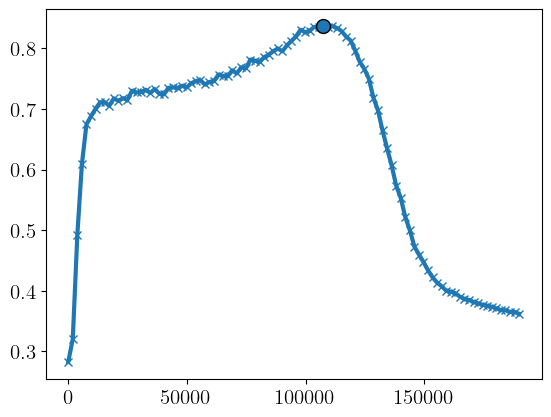

In [15]:
dataset_name = 'PIANO'
#ax[1, 3].set_xscale('log')
acc_max_idx = np.argmax(acc_lists_Rdm[dataset_name])
t_acc_max = alltimes_Rdm[dataset_name][acc_max_idx]
acc_max = float(acc_lists_Rdm[dataset_name][acc_max_idx])
plt.plot(np.array(alltimes_Rdm[dataset_name]), acc_lists_Rdm[dataset_name], lw=3, zorder=0,marker='x')
plt.scatter(t_acc_max, acc_max, s=100, zorder=1, edgecolors='black')